# **Predicting Exam Score From Student Habits**
By: Ethan Herrell, Ayesha Habib, Charlie Heyworth, and Emma West


**Executive Summary:**

This project analyzes the relationship between student habits and academic performance using exploratory data analysis and machine learning models. After cleaning and normalizing the data, key lifestyle features were engineered, including a wellness score based on sleep, exercise, and mental health, and total entertainment hours. Exam scores were converted into a binary outcome to support classification. Random Forest and Logistic Regression models were developed, with them a showing high and medium predictive performance respectively. The logistic regression model achieved about 66% accuracy with an ROC–AUC score of 0.71, offering strong interpretability, while the random forest model achieved about 93% accuracy with an ROC-AUC score of 0.976. Overall, the results indicate that higher wellness is associated with better exam outcomes, while increased entertainment time is linked to lower performance, highlighting the practical value of data-driven insights for supporting student success.

**Problem Statement:**

Student performance is shaped by many different factors, such as attendance, study habits, socioeconomic background, parental involvement, health, and day-to-day behaviors at school. With the growing influence of social media and increased internet use among children and teenagers, it’s also important to understand how these habits may impact academic success. By identifying which factors are most strongly linked to higher failing rates and which ones support strong exam performance, we can help educators, parents, and schools develop more effective strategies to support students.

Our research questions are focused on finding the aspects of a student’s lifestyle that can lead to failing grades on exams and the aspects that could help increase the chances of the student’s ability to earn a high score (>90). Our scope of data pertains to students in college, ages 17-24, however it could be extrapolated to infer attributes of success and failure for younger age students that are still in K-12.


**Research Questions & Objectives**

*Research Question 1:* What factors most strongly contribute to students failing their exams?

*Research Question 2:* Which student characteristics and behaviors are associated with higher exam scores?

*Objectives:* Our objective is to find meaningful relationships between study hours, sleep, social media usage, Netflix usage, mental health, and other metrics to analyze the performance of students. Using our findings, we can better help students perform on exams and achieve success more frequently. These objectives align with our research questions because if we are able to accurately answer both of our research questions, our objective can be accomplished. If we know what negatively and positively correlates with exam scores, we can advise students and teachers to take measures that will give students a better possibility of scoring higher on exams.

**Data Description:**

The dataset includes 1000 rows, each a single student, and 16 variables describing their demographics, daily habits, lifestyle factors, and academic performance. Each row represents one student, and while the dataset is ready to analyze, it likely contains some missing values that may need cleaning. Although this dataset is made of simulated data, conclusions drawn from the analysis could still provide insights into real-life scenarios.

The key variables cover areas such as study habits, sleep, exercise, screen time, mental health, and class attendance, along with background factors like gender, parental education, and internet quality. These features describe a detailed picture of students’ routines and environments. The main outcome of interest is exam_score, which can be explored in relation to habits and lifestyle patterns to understand what influences academic performance. Conversely, exam scores can be used to analyze metrics like mental health and exercise.


## **Dataset EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("student_habits.csv")

**Data Cleaning.** Missing values were found in sleep_hours, parental_education_level, and exam_score. After removing all rows with missing data, the total amount of usable data is 727 columns with 16 rows of student metrics.

In [ ]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

print("Columns with missing values:")
print(missing_counts)

df_clean = df.dropna().copy()

print(f"Original shape: {df.shape}")
print(f"After dropping missing rows: {df_clean.shape}")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

Columns with missing values:
sleep_hours                 108
parental_education_level     91
exam_score                   99
dtype: int64
Original shape: (1000, 16)
After dropping missing rows: (727, 16)
Numeric columns: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


**Decriptive Statistics.** Count, mean, median, standard deviation, min/max, and quartiles were calculated for each numeric column. It was found that 23 rows contain outliers using the IQR method. For each categorical row, category counts were made and each category has at least one value.

In [ ]:
# Descriptive statistics for numeric variables (mean, std, min, max, quartiles)
print("\nDescriptive statistics (numeric columns):")
print(df_clean[numeric_cols].describe().T)

# Median values for numeric variables
print("\nMedian values:")
print(df_clean[numeric_cols].median())

# Distribution info via value_counts for some key categorical vars
categorical_cols = df_clean.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical variables:", categorical_cols)

for col in ["gender", "part_time_job", "diet_quality", "internet_quality", "extracurricular_participation"]:
    if col in df_clean.columns:
        print(f"\nValue counts for {col}:")
        print(df_clean[col].value_counts())

#Rows with Outliers

numeric_cols = df.select_dtypes(include='number').columns
outlier_rows = set()

for col in numeric_cols:
    series = df[col]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    col_outliers = df[(series < lower) | (series > upper)].index
    outlier_rows.update(col_outliers)

print("Number of rows with outliers:", len(outlier_rows))


Descriptive statistics (numeric columns):
                       count       mean        std   min   25%   50%    75%  \
age                    727.0  20.466300   2.295319  17.0  18.0  20.0  22.00   
study_hours_per_day    727.0   3.534388   1.441533   0.0   2.6   3.5   4.50   
social_media_hours     727.0   2.500413   1.188449   0.0   1.7   2.4   3.30   
netflix_hours          727.0   1.796011   1.058078   0.0   1.0   1.8   2.50   
attendance_percentage  727.0  83.891609   9.569990  56.0  77.5  84.2  91.10   
sleep_hours            727.0   6.508391   1.234702   3.3   5.6   6.5   7.35   
exercise_frequency     727.0   3.059147   2.065877   0.0   1.0   3.0   5.00   
mental_health_rating   727.0   5.440165   2.850051   1.0   3.0   5.0   8.00   
exam_score             727.0  69.597524  16.763814  23.1  58.5  70.5  81.55   

                         max  
age                     24.0  
study_hours_per_day      7.6  
social_media_hours       7.2  
netflix_hours            5.4  
attendance_

**Data Visualization**

**Plot 1: Box Plot.** This will help us visualize distribution of values in numeric rows. This allows us to find rows that include outlier values. We can see that there are outliers in study_hours_per_day, social_media_hours, netflix_hours, attendance_percentage, sleep_hours, and exam_score. To make meaningful insights, we must remove these outlier values for our analysis.

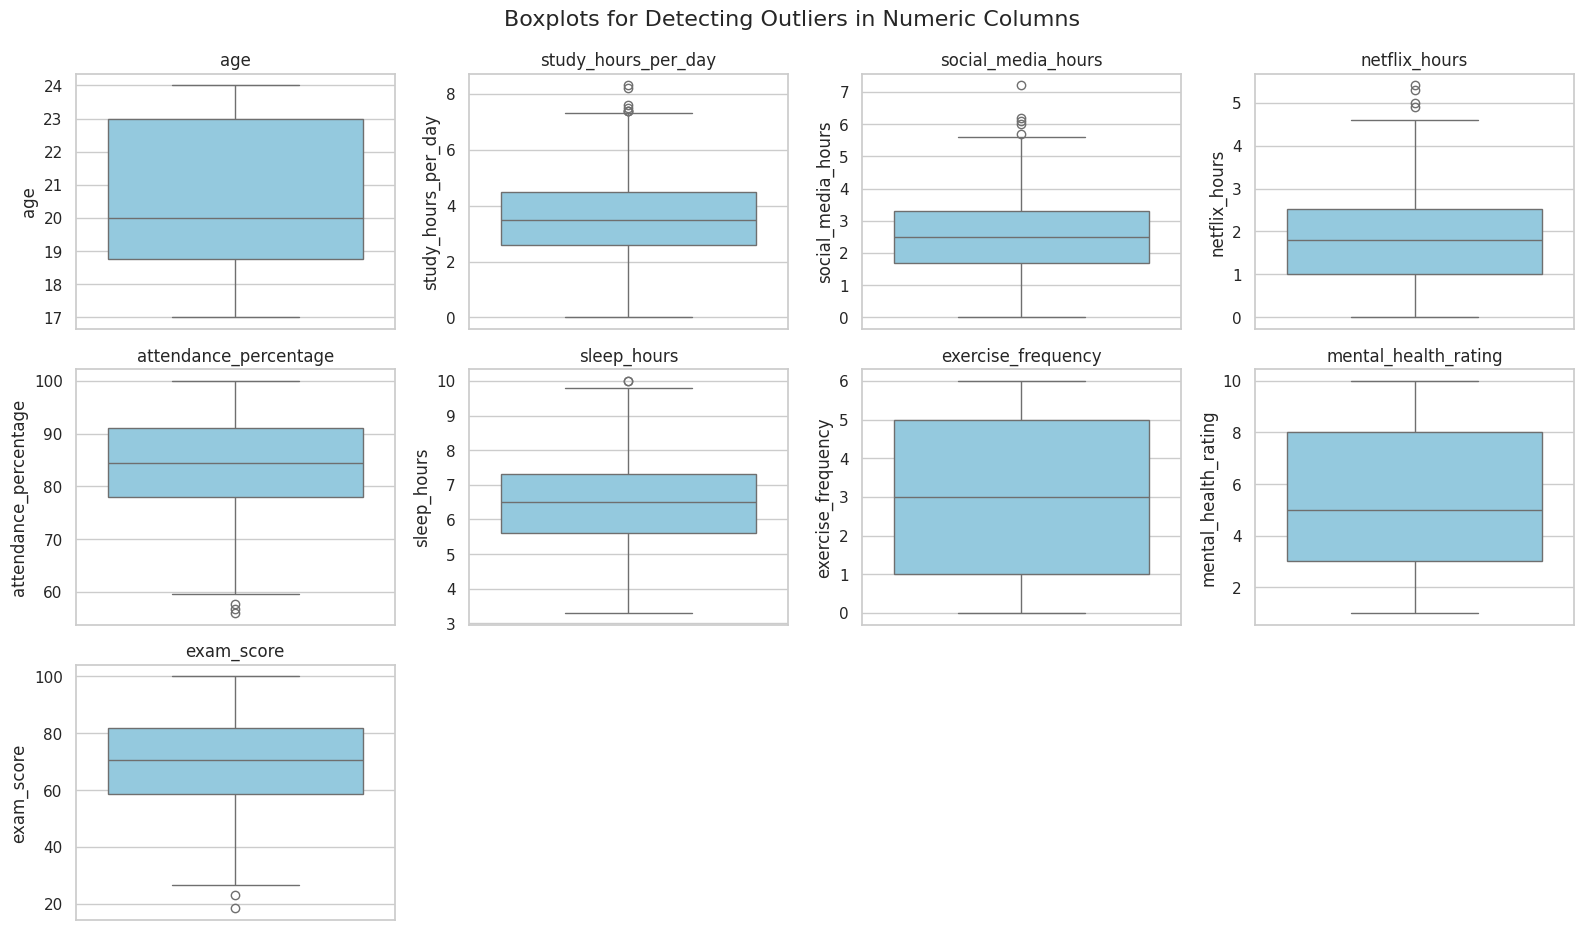

Cleaned CSV file saved as 'cleaned_no_outliers.csv'


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Boxplots for Detecting Outliers in Numeric Columns", fontsize=16, y=1.02)
plt.show()

#Eliminating outliers

numeric_cols = df.select_dtypes(include='number').columns
outlier_rows = set()

for col in numeric_cols:
    series = df[col]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    col_outliers = df[(series < lower) | (series > upper)].index
    outlier_rows.update(col_outliers)

# Create cleaned dataframe with no missing values or outliers
df_clean_no_outliers = (
    df
    .drop(index=outlier_rows)   # remove outlier rows
    .dropna()                   # remove rows with any missing values
    .reset_index(drop=True)
)

df_clean_no_outliers.to_csv("cleaned_no_outliers.csv", index=False)

print("Cleaned CSV file saved as 'cleaned_no_outliers.csv'")


**Outliers Implications**

Outliers were identified using the interquartile range (IQR) method, which works well even when data is not perfectly normally distributed. Extreme values in variables such as study hours and exam scores may reflect unrealistic behavior or artifacts from the simulated dataset. Since machine learning models—especially logistic regression—can be affected by extreme values, these rows were removed to improve model reliability and performance.


**Plot 2: Histogram of Exam Score.** This plot will help us visualize the distribution of exam scores in the dataset. We can tell from this visualization that the exam scores are somewhat normally distributed with most scores around 70. The data is skewed left which is expected for exam score data. We can also tell there is a large spread of exam scores, ranging from 100 to below 30.

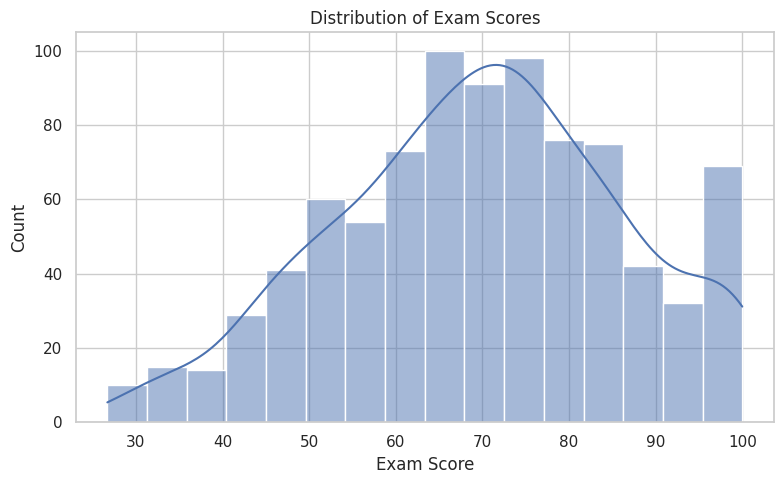

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean_no_outliers["exam_score"], kde=True)
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Plot 3: Histogram of Daily Study Hours.** This will help us visualize the distribution of daily study hours in the dataset. From this visualization we can tell that the study_hours_per_day is normally distributed with no skew. Most students study between 3-4 hours a day with the most being a little above 7 hours and the least around 0 hours.

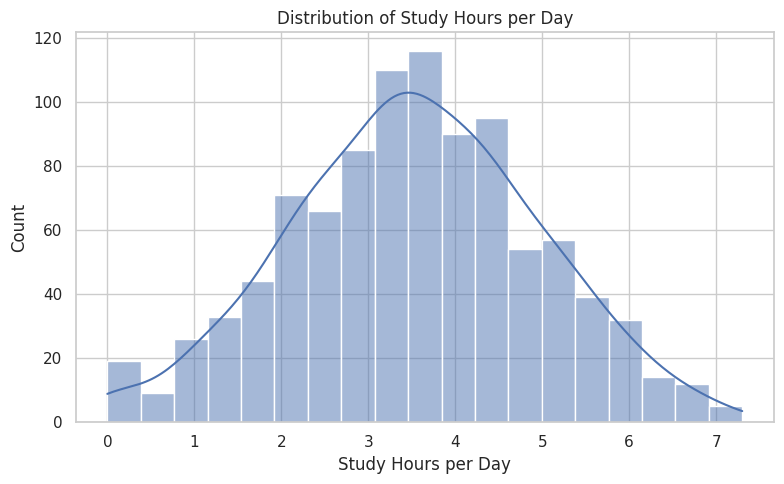

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_clean_no_outliers["study_hours_per_day"], kde=True)
plt.title("Distribution of Study Hours per Day")
plt.xlabel("Study Hours per Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Histogram Implications**

*Exam Score Histogram*

The exam scores follow a roughly normal distribution, with most students scoring near the middle and fewer students receiving very low scores. This pattern is typical in academic data and makes it reasonable to group exam scores into categories such as higher and lower performance. Because of this, exam scores can be effectively converted into a binary outcome for classification models.


*Study Hours Histogram*

Most students study around 3–4 hours per day, which suggests a common baseline level of academic effort. The distribution does not show strong skew, meaning study habits are fairly balanced across students. This makes study hours well-suited for linear models like logistic regression, which perform best when relationships between variables are consistent and evenly distributed.

**Plot 4: Scatter plot of Study Hours vs Exam Score.** This will help us visualize a possible correlation between these two variables. It would be expected for these values to be positively correlated. This plot shows a clear and strong correlation between study hours and exam score. This helps us in our research questions and objectives and will be a key metric for our final insights.

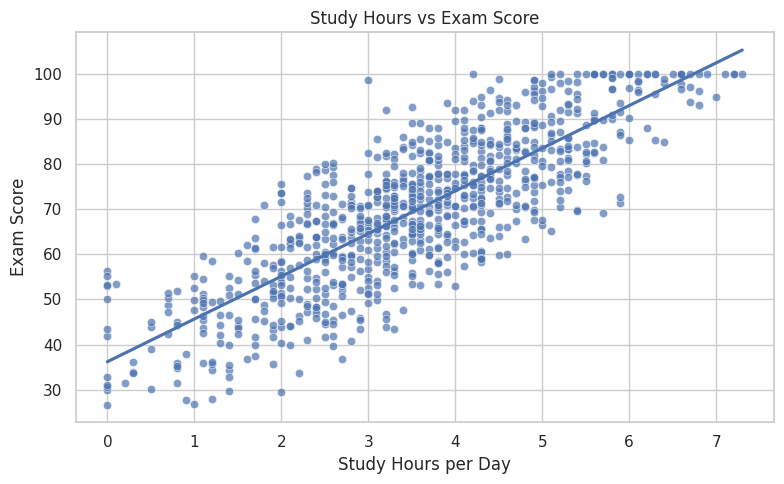

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_clean_no_outliers,
    x="study_hours_per_day",
    y="exam_score",
    alpha=0.7
)
sns.regplot(
    data=df_clean_no_outliers,
    x="study_hours_per_day",
    y="exam_score",
    scatter=False,
    ci=None
)
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

**Scatter Plot Implications**

The strong positive linear relationship between study hours and exam score indicates that increased study time is associated with better academic performance. However, one thing to note is that this relationship likely reflects correlation rather than causation; students who study more may also possess other positive traits such as stronger motivation or time management skills. Even so, the consistency and magnitude of this relationship indicate that study hours is still one of the most influential factors associated with exam performance.

**Plot 5: Box plot of Exam Score by Diet Quality.** This will help us visualize a possible relationship between the categorial row of diet and exam score. We can tell there a small correlation with diet quality and exam score. As diet quality increases, there is a small increase in exam score, however in each diet quality, a score of 100 is present. The median score shows the best relationship as it increases with each increment of diet quality.

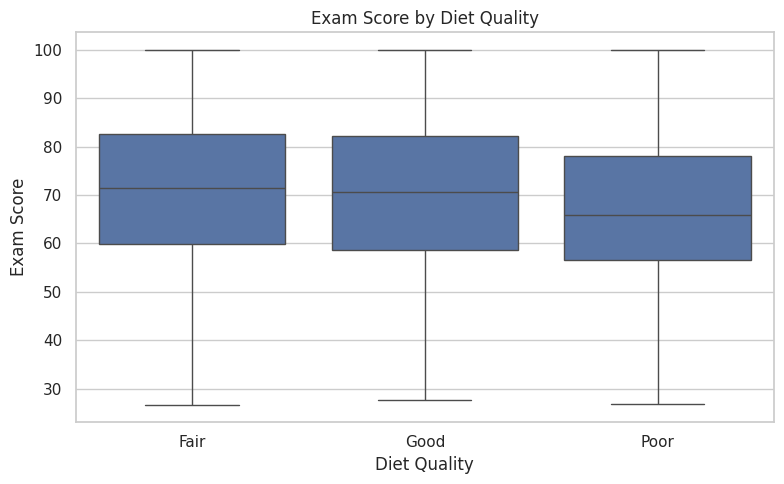

In [ ]:
if "diet_quality" in df_clean_no_outliers.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=df_clean_no_outliers,
        x="diet_quality",
        y="exam_score",
        order=sorted(df_clean_no_outliers["diet_quality"].unique())
    )
    plt.title("Exam Score by Diet Quality")
    plt.xlabel("Diet Quality")
    plt.ylabel("Exam Score")
    plt.tight_layout()
    plt.show()

**Diet Box Plot Implications**

Although median exam scores increase with diet quality, the large overlap between score distributions across categories suggests that diet alone is not a strong predictor of performance. This indicates that while nutrition may support academic success, it likely interacts with other factors such as sleep, mental health, and study habits rather than acting independently.

**Plot 6: Correlation Heatmap.** This will help us look at all numeric values and their correlation with each other. This will give us the most information that could lead us to answering our research questions. This is the most helpful and most informative plot. This heatmap shows a very strong correlation between study hours and exam score, with smaller correlations with sleep, exercise, and mental health. It also shows negative correlations with social media use and netflix use with exam score. Suprisingly, attendance is one of the least positive strong correlations with exam score.

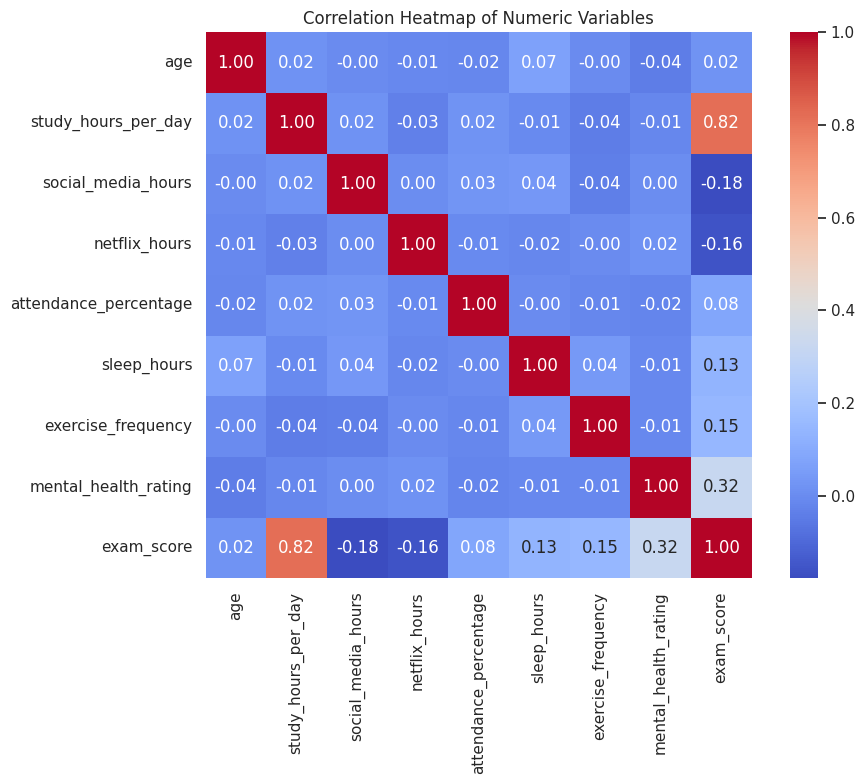

In [ ]:
plt.figure(figsize=(10, 8))
corr = df_clean_no_outliers[numeric_cols].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True
)
plt.title("Correlation Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

**Heatmap Implications**

The heatmap reveals that wellness-related variables, like sleep hours, exercise frequency, and mental health rating, are moderately positively correlated with exam score and with each other. This clustering is what led us to create a composite wellness score during feature engineering, which allows the model to capture holistic lifestyle effects rather than  isolated behaviors.


Correlation with Exam Score Summary. This summary shows the same metrics as the heatmap but in a easier-to-read format and to a smaller decimal place.

In [ ]:
exam_corr = corr["exam_score"].sort_values(ascending=False)
print("\nCorrelation with exam_score:")
print(exam_corr)


#Average exam score by part-time job status
avg_exam_by_job = df_clean_no_outliers.groupby("part_time_job")["exam_score"].mean()

print("Average Exam Score by Part-Time Job Status:")
print(avg_exam_by_job)



Correlation with exam_score:
exam_score               1.000000
study_hours_per_day      0.818856
mental_health_rating     0.319755
exercise_frequency       0.147587
sleep_hours              0.131660
attendance_percentage    0.079588
age                      0.022661
netflix_hours           -0.157396
social_media_hours      -0.178615
Name: exam_score, dtype: float64
Average Exam Score by Part-Time Job Status:
part_time_job
No     70.020231
Yes    68.535294
Name: exam_score, dtype: float64


# **EDA Insights**

From our EDA we have found that there are missing values and outlier values in our dataset. After performing data cleaning and removing the missing values and outlier values, we produced 6 plots to visualize the data to find trends and relationship. After reviewing the plots, we have found major relationships with exam score. From greatest to least positive relationship, daily study hours, mental health, exercise, and sleep hours had meaningful relationships with exam score while attendance and age also correlated positively but were very weak.

On the other hand, usage of netflix and social media hours had a clear negative relationship with exam score. Furthermore, students with a part-time job on average performed worse on tests than students without a part-time job.

These insights are key to our objectives and research questions. We can use these insights to create our model to find more in-depth correlations within the data.

# **Machine Learning Models**

### **Model 1: Random Forest**

Data shape: (712, 16)
Columns: ['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'parental_education_level', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4



Engineered features added: wellness_score, total_entertainment_hours


,wellness_score,total_entertainment_hours
0,22.0,2.3
1,18.6,5.1
2,10.0,4.4
3,14.2,4.9
4,8.9,4.9



Target counts:
high_performer
0    627
1     85
Name: count, dtype: int64

Scaled columns added: ['sleep_hours_scaled', 'exercise_frequency_scaled', 'mental_health_rating_scaled', 'netflix_hours_scaled', 'social_media_hours_scaled']


,sleep_hours_scaled,exercise_frequency_scaled,mental_health_rating_scaled,netflix_hours_scaled,social_media_hours_scaled
0,1.217169,1.42635,0.895935,-0.657830,-1.099017
1,-1.550039,1.42635,0.895935,0.491087,0.278321
2,1.217169,-1.00090,-1.557548,-0.466344,0.536572
3,2.193831,0.45545,-1.557548,-0.753573,1.225241
4,-1.305874,-0.03000,-1.557548,-1.232289,1.655659



Categoricals to encode: ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

Final feature count: 19
['study_hours_per_day', 'attendance_percentage', 'wellness_score', 'total_entertainment_hours', 'sleep_hours_scaled', 'exercise_frequency_scaled', 'mental_health_rating_scaled', 'netflix_hours_scaled', 'social_media_hours_scaled', 'gender_Male', 'gender_Other', 'part_time_job_Yes', 'diet_quality_Good', 'diet_quality_Poor', 'parental_education_level_High School', 'parental_education_level_Master', 'internet_quality_Good', 'internet_quality_Poor', 'extracurricular_participation_Yes']

Train/test shapes: (569, 19) (143, 19)
Train positive ratio: 0.1195079086115993 Test positive ratio: 0.11888111888111888

Random Forest trained.

Accuracy: 0.9371

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       126
           1       0.83      0.59      0.

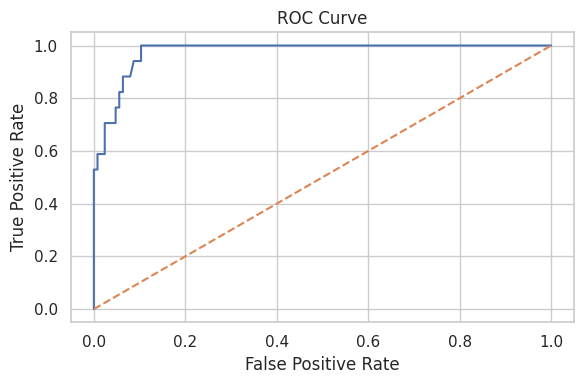


Top 10 feature importances:
study_hours_per_day            0.470980
wellness_score                 0.118308
attendance_percentage          0.063970
mental_health_rating_scaled    0.055621
total_entertainment_hours      0.050718
netflix_hours_scaled           0.047084
social_media_hours_scaled      0.044144
sleep_hours_scaled             0.043106
exercise_frequency_scaled      0.034557
internet_quality_Poor          0.010860
dtype: float64


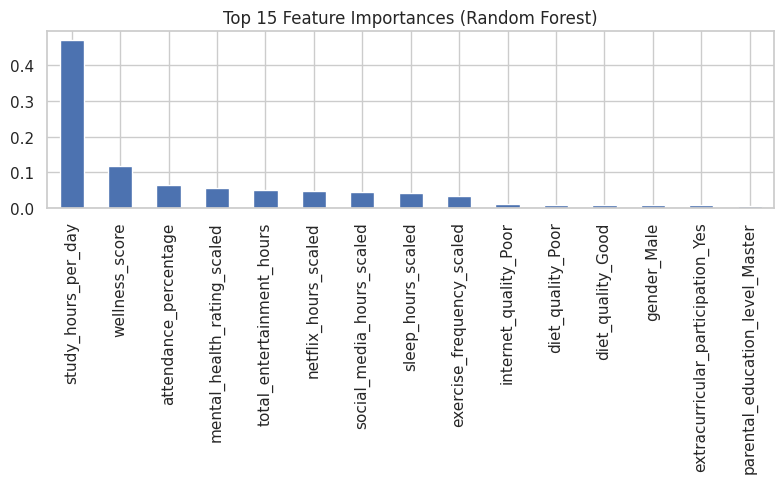

In [ ]:
# Random Forest pipeline for predicting high performers (exam_score >= 90)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)

# ---------------------------
# 1) Load data
# ---------------------------
csv_path = "cleaned_no_outliers.csv"
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    raise FileNotFoundError(f"Cannot find '{csv_path}'. Upload the file to Colab (left panel -> Files) or set csv_path to the correct path.")

print("Data shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# ---------------------------
# 2) Engineered features
# ---------------------------
df['wellness_score'] = df['sleep_hours'] + df['exercise_frequency'] + df['mental_health_rating']
df['total_entertainment_hours'] = df['social_media_hours'] + df['netflix_hours']
print("\nEngineered features added: wellness_score, total_entertainment_hours")
display(df[['wellness_score','total_entertainment_hours']].head())

# ---------------------------
# 3) Binary target: high_performer
# ---------------------------
if 'exam_score' not in df.columns:
    raise ValueError("Column 'exam_score' not found. Make sure 'exam_score' exists in the CSV.")

df['high_performer'] = (df['exam_score'] >= 90).astype(int)
print("\nTarget counts:")
print(df['high_performer'].value_counts())

# ---------------------------
# 4) Scale requested columns
# ---------------------------
cols_to_scale = ['sleep_hours', 'exercise_frequency', 'mental_health_rating', 'netflix_hours', 'social_media_hours']
missing_cols = [c for c in cols_to_scale if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns required for scaling: {missing_cols}")

scaler = StandardScaler()
scaled_vals = scaler.fit_transform(df[cols_to_scale])
scaled_cols = [c + '_scaled' for c in cols_to_scale]
df[scaled_cols] = scaled_vals
print("\nScaled columns added:", scaled_cols)
display(df[scaled_cols].head())

# ---------------------------
# 5) Select features & encode categoricals
# ---------------------------
# Use scaled versions for the five specified columns.
numeric_features = [
    'study_hours_per_day',
    'attendance_percentage',
    'wellness_score',
    'total_entertainment_hours',
    # scaled versions
    'sleep_hours_scaled',
    'exercise_frequency_scaled',
    'mental_health_rating_scaled',
    'netflix_hours_scaled',
    'social_media_hours_scaled'
]

categorical_candidates = [
    'gender', 'part_time_job', 'diet_quality',
    'parental_education_level', 'internet_quality', 'extracurricular_participation'
]
categorical_features = [c for c in categorical_candidates if c in df.columns]
print("\nCategoricals to encode:", categorical_features)

if categorical_features:
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Build final features list
final_features = numeric_features[:]
# Add any created dummy columns (they will start with the categorical name + '_')
for col in df.columns:
    for pref in categorical_candidates:
        if col.startswith(pref + '_'):
            final_features.append(col)

# Remove any feature that doesn't exist or that might be the target accidentally
final_features = [f for f in final_features if f in df.columns]
print("\nFinal feature count:", len(final_features))
print(final_features)

# ---------------------------
# 6) Train/test split
# ---------------------------
X = df[final_features]
y = df['high_performer']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain/test shapes:", X_train.shape, X_test.shape)
print("Train positive ratio:", y_train.mean(), "Test positive ratio:", y_test.mean())

# ---------------------------
# 7) Train Random Forest
# ---------------------------
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
print("\nRandom Forest trained.")

# ---------------------------
# 8) Predictions & evaluation
# ---------------------------
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print("Classification report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

# ---------------------------
# 9) Feature importances
# ---------------------------
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("\nTop 10 feature importances:")
print(feat_imp.head(10))

plt.figure(figsize=(8,5))
feat_imp.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()



**Random Forest Analysis**

The Random Forest model demonstrates strong predictive performance, achieving 93.7% accuracy and a high AUC of 0.976, indicating it can reliably distinguish between high-performing students and others. The feature-importance results reveal meaningful behavioral patterns. Study hours per day is by far the strongest predictor of high performance, reinforcing that consistent study habits remain the most influential factor in academic success.

The next most important feature, wellness_score (sleep + exercise + mental health), shows that lifestyle balance also plays a major role; healthier students tend to perform better academically. Attendance percentage ranks third, aligning with the idea that students who attend class more frequently stay engaged and benefit from structured learning.

The model also highlights mental health rating, total entertainment hours, and the scaled measures of Netflix and social-media use as impactful predictors, suggesting that excessive screen time is associated with lower performance. Overall, these insights support the project’s narrative that academic outcomes are shaped not only by study habits but also by broader lifestyle factors, including wellness routines and digital behaviors. The model’s performance and feature rankings emphasize that supporting student success requires promoting effective study habits alongside healthier, more balanced daily routines.

### **Model 2: Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =========================
# 1) Load dataset
# =========================
df = pd.read_csv("cleaned_no_outliers_no_missing_normalized.csv")

# =========================
# 2) Feature engineering
#    Wellness Score + Total Entertainment Hours
# =========================
df["wellness_score"] = (
    df["sleep_hours_norm"] +
    df["exercise_frequency_norm"] +
    df["mental_health_rating_norm"]
) / 3

df["total_entertainment_hours"] = df["social_media_hours"] + df["netflix_hours"]

# =========================
# 3) Create classification target from exam_score
#    (Logistic Regression needs classes, not continuous values)
# =========================
df["exam_score_class"] = (df["exam_score"] >= df["exam_score"].median()).astype(int)

# =========================
# 4) Select features/target
# =========================
X = df[["wellness_score", "total_entertainment_hours"]]
y = df["exam_score_class"]

# =========================
# 5) Train/test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# =========================
# 6) Build + train pipeline
# =========================
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

# =========================
# 7) Evaluate
# =========================
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# =========================
# 8) Coefficients (interpretability)
# =========================
coefs = pipeline.named_steps["log_reg"].coef_[0]
coef_table = pd.DataFrame({"feature": X.columns, "coefficient": coefs}).sort_values(
    by="coefficient", ascending=False
)

print("\nLogistic Regression Coefficients:\n", coef_table)

from sklearn.metrics import roc_auc_score, roc_curve

# =========================
# 9) ROC–AUC Evaluation
# =========================
# Get predicted probabilities for the positive class
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC–AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC–AUC Score:", roc_auc)

Accuracy: 0.6643356643356644

Confusion Matrix:
 [[48 24]
 [24 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67        72
           1       0.66      0.66      0.66        71

    accuracy                           0.66       143
   macro avg       0.66      0.66      0.66       143
weighted avg       0.66      0.66      0.66       143


Logistic Regression Coefficients:
                      feature  coefficient
0             wellness_score     0.677529
1  total_entertainment_hours    -0.509449
ROC–AUC Score: 0.7120500782472614


**Logistic Regression Analysis**

The logistic regression model achieved an accuracy of 0.664, indicating moderate predictive performance. The confusion matrix shows balanced results, with 48 true negatives and 47 true positives, alongside an equal number of false positives and false negatives (24 each), suggesting no strong class bias. Precision, recall, and F1-scores are all approximately 0.66 for both classes, indicating consistent performance across outcomes. The logistic regression model achieved an ROC–AUC score of 0.71, indicating a good ability to distinguish between higher and lower exam score outcomes.

Logistic regression was selected because it is well suited for binary classification and offers strong interpretability. The model coefficients provide clear insights: wellness score has a positive association with exam performance, while total entertainment hours have a negative association. As a simple, efficient, and explainable model, logistic regression serves as an appropriate baseline for predicting exam outcomes.

**Model Takeaways**

Variables with the strongest correlations to exam score, such as study hours and mental health rating, are well-suited for linear models like logistic regression, which benefit from monotonic relationships. On the other hand, weaker but non-linear relationships, such as those involving entertainment hours, may be better displayed by ensemble models like random forests. This helps explain the performance gap between the two models.


# **Results and Discussion**

**Summary of Results**

The exploratory analysis showed clear patterns in the data. Students with higher wellness scores generally performed better on exams, while those who spent more time on entertainment tended to score lower. Both models reflected these trends. The logistic regression model produced moderate accuracy and was easy to interpret, clearly showing how each factor influenced exam outcomes. The random forest model captured more complex, non-linear relationships and had a much more accurate predictive capability. Together, the results suggest that lifestyle factors play a meaningful role in exam performance, even if they do not tell the full story.

To tie it back to our driving research questions, as students increase their social media and entertainment time, grades tend to decline leading to a increased liklihood of failing their exams. On the contrary, students that performed well on exams had on average a greater amount of time studying and exercise. This shows that a healthy work-life balance with consistent studying, healthy activity, and less social media use can help student attain higher exam scores.  

**Practical Implications**

These findings have practical value in educational settings. Schools or advisors could use similar models to identify students who may be at risk academically and encourage healthier habits, such as improving overall wellness or balancing leisure time. The logistic regression model is especially useful for communication and decision-making due to its simplicity, while the random forest model is better suited when prediction accuracy is the main goal.

**Future Work**

Model performance could be improved by incorporating additional data, such as study time, sleep patterns, class attendance, or prior academic results. Exploring more advanced models, including gradient boosting or neural networks, may also improve predictive power. We could further tune our model parameters and use cross-validation to strengthen the evaluation. Additionally, predicting exam scores as a continuous variable rather than a binary outcome could provide more detailed insights.

**Reflection**

One of the main challenges was working with a limited number of predictors, which restricted how well the models could perform. This was addressed through careful data cleaning, normalization, and feature engineering rather than relying on a single approach. Python tools such as pandas and scikit-learn were effective for analysis and modeling, and language models were helpful for creating and debugging code, organizing results, and refining explanations. Overall, combining statistical methods with these tools made the analysis clearer and more efficient.

# **References**

1. Barnes, L., & Bolton, M. (2025, November 2). Feature Engineering and Model Evaluation [Lecture slides]. SYS 3501: Computational Methods for AI Systems. University course materials.

2. Google. (2024). Gemini [Large language model]. https://gemini.google.com/

3. Jayaantanaath. (n.d.). Student habits vs academic performance [Data set]. Kaggle. https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

4. OpenAI. (2025). ChatGPT (GPT-5.2) [Large language model]. https://chat.openai.com/

